# Drift normalized by observing frequency vs. Burst Duration

In [152]:
df = source.loc[180911]
df[['drift_min', 'drift_over_nuobs', 'DM']]
# df[((df.name == 180911.0) & (df.DM != 190))][['DM']]
# df[~((df.DM == 190) & (df.drift_min < 0))]
fig1pltdata['frames'][0].loc[1.0]

Unnamed: 0                        280
DM                              559.7
center_f                      4458.21
drift (mhz/ms)               -1039.36
drift error (mhz/ms)         0.190767
red_chisq                     9.73368
amplitude                     1816.78
xo                            512.499
yo                            512.485
sigmax                        173.991
sigmay                        47.0716
angle                         1.71656
amp_error                    0.116109
xo_error                     0.003385
yo_error                     0.011008
sigmax_error                0.0111403
sigmay_error               0.00300692
angle_error               2.63773e-05
time_res                    1.024e-05
drift_abs                     1039.36
drift_over_nuobs             0.233134
recip_drift_over_nuobs        4.28938
min_sigma                     47.0716
max_sigma                     173.991
min_sigma_error            0.00300692
max_sigma_error             0.0111403
sigma_t     

b:\dev\frbrepeaters\driftlaw.py:10: RuntimeWarning: invalid value encountered in double_scalars
  tauwerror_expr = lambda r: 1e3*r['time_res']*np.sqrt(r['max_sigma']**6*r['min_sigma_error']**2*np.cos(r['angle']-np.pi/2)**4 + r['angle_error']**2*r['max_sigma']**2*r['min_sigma']**2*(-r['max_sigma']**2 + r['min_sigma']**2)**2*np.cos(r['angle']-np.pi/2)**2*np.sin(r['angle']-np.pi/2)**2 + r['max_sigma_error']**2*r['min_sigma']**6*np.sin(r['angle']-np.pi/2)**4)/(r['max_sigma']**2*np.cos(r['angle']-np.pi/2)**2 + r['min_sigma']**2*np.sin(r['angle']-np.pi/2)**2)**1.5


FRB121102	 DM Range: 554.1030000000002 - 565.297 pc/cm3
FRB121102 Gajjar	 DM Range: 555.0 - 583.0 pc/cm3
FRB180916	 DM Range: 346.82 - 349.82 pc/cm3
FRB180814	 DM Range: 188.7 - 190.0 pc/cm3

# FRB121102:
	 DM Range: 554.1030000000002 - 565.297 pc/cm3
> exclusion: no fit found
>> bursts excluded: 
	4.0 DM = 555.8704736842105 
	4.0 DM = 561.762052631579
> exclusion: drift_abs < 0
>> bursts excluded: 
	6.0 DM = 561.762052631579 
	6.0 DM = 562.3512105263159 
	6.0 DM = 562.9403684210527 
	14.0 DM = 562.9403684210527 
	6.0 DM = 563.5295263157897 
	14.0 DM = 563.5295263157897 
	3.0 DM = 564.1186842105262 
	6.0 DM = 564.1186842105262 
	14.0 DM = 564.1186842105262 
	3.0 DM = 564.7078421052632 
	5.0 DM = 564.7078421052632 
	6.0 DM = 564.7078421052632 
	14.0 DM = 564.7078421052632 
	3.0 DM = 565.297 
	5.0 DM = 565.297 
	6.0 DM = 565.297 
	14.0 DM = 565.297
> exclusion: drift error > 1e30
>> bursts excluded: 
	none
>>> FRB121102 DM Range by burst:
	burst 1.0:	 DM Range: 554.1030000000002 - 565.29

(0.0728, 12.5)

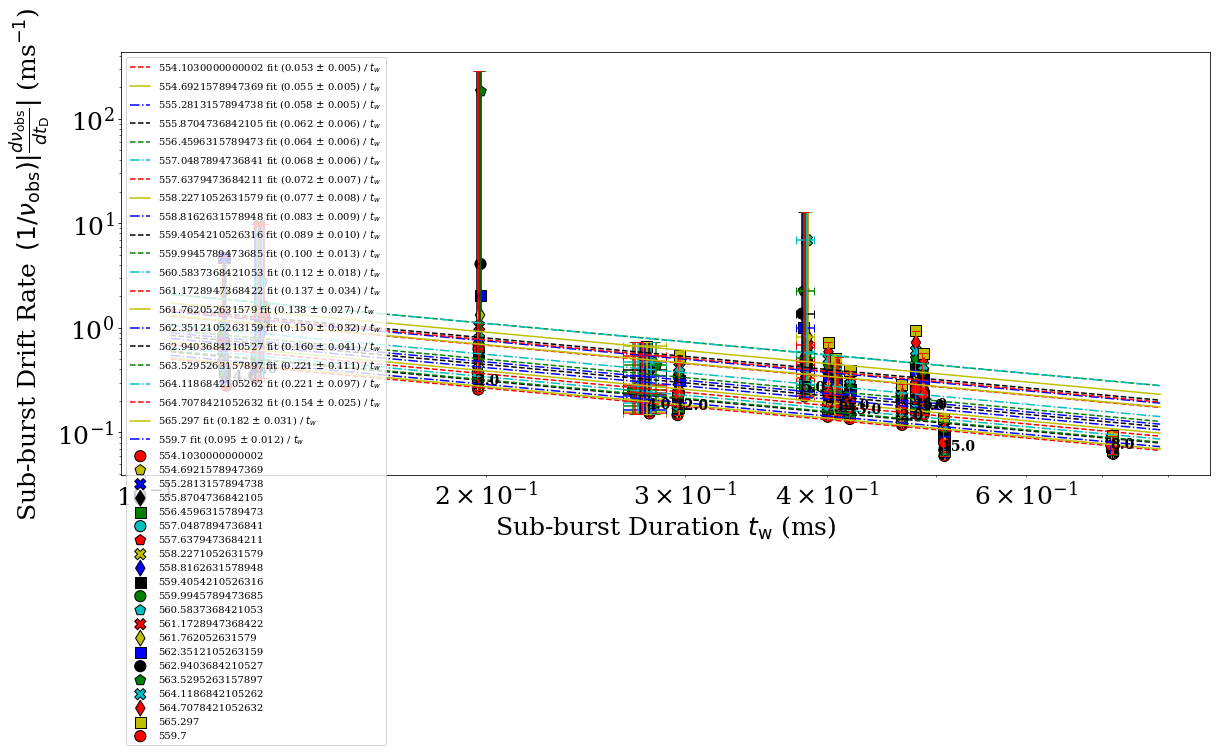

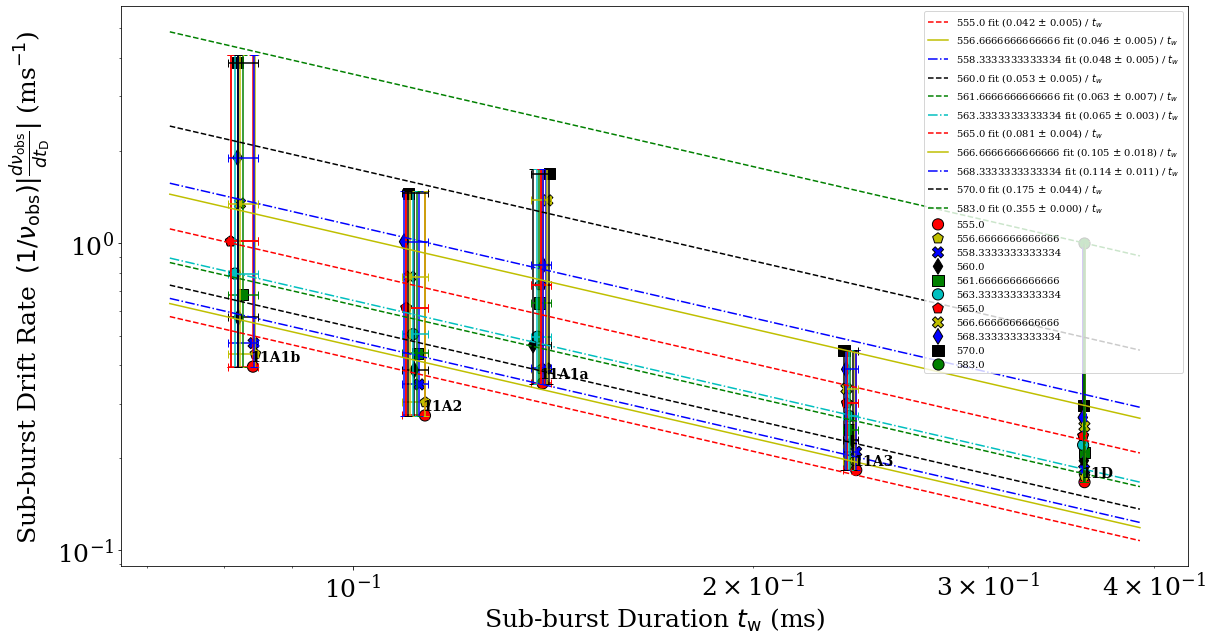

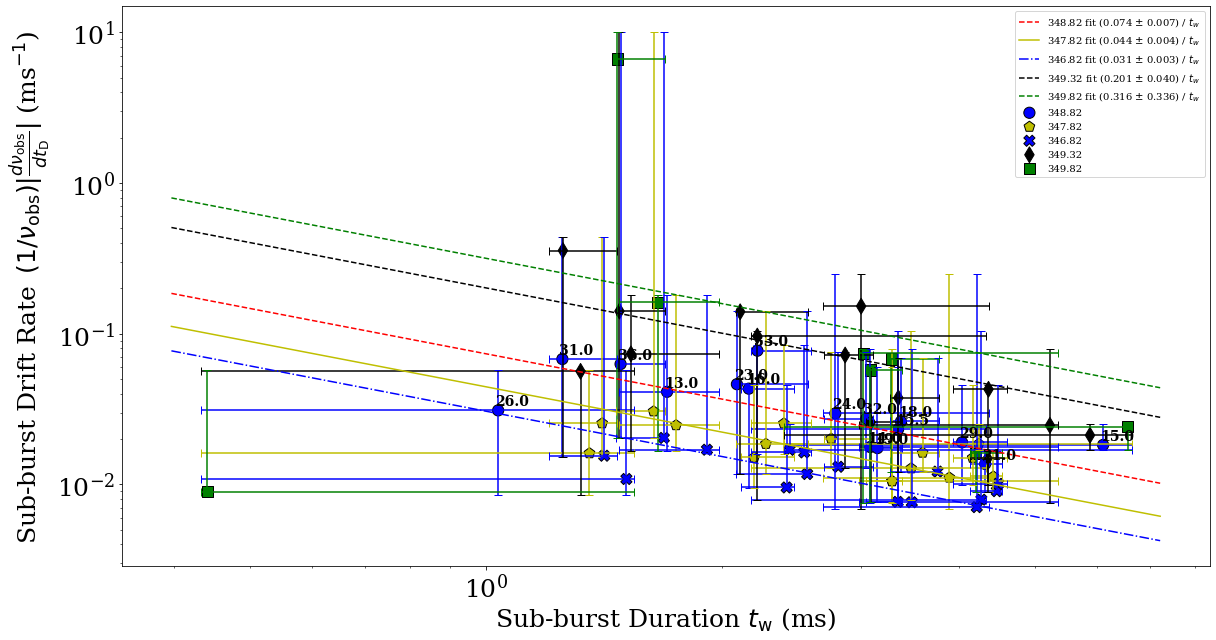

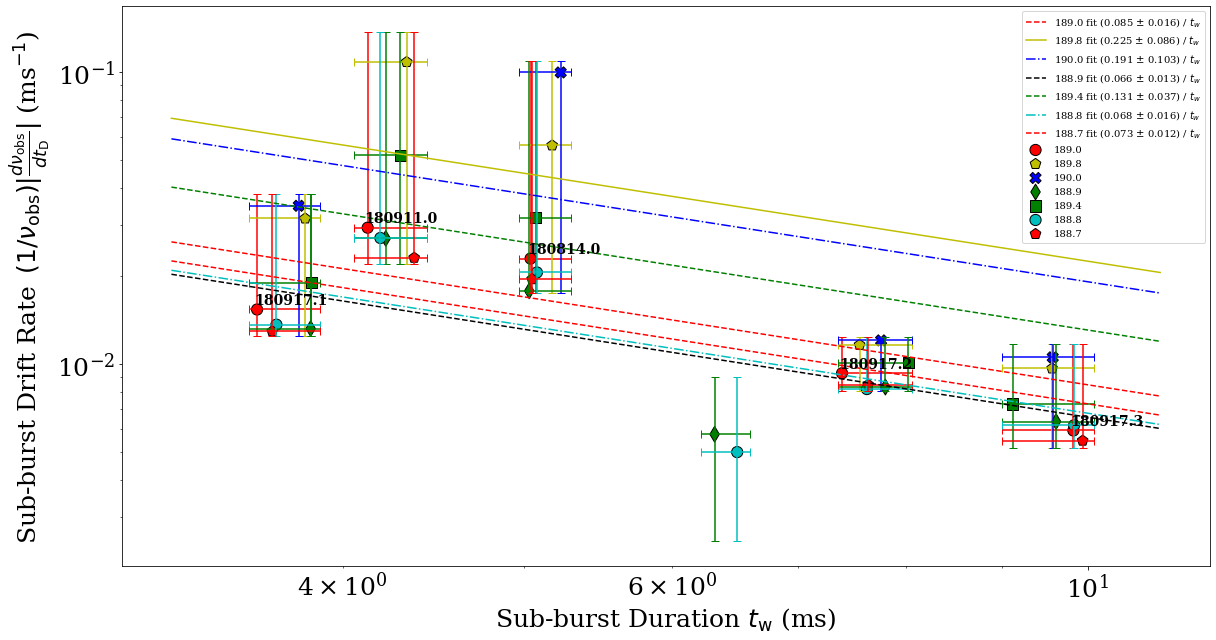

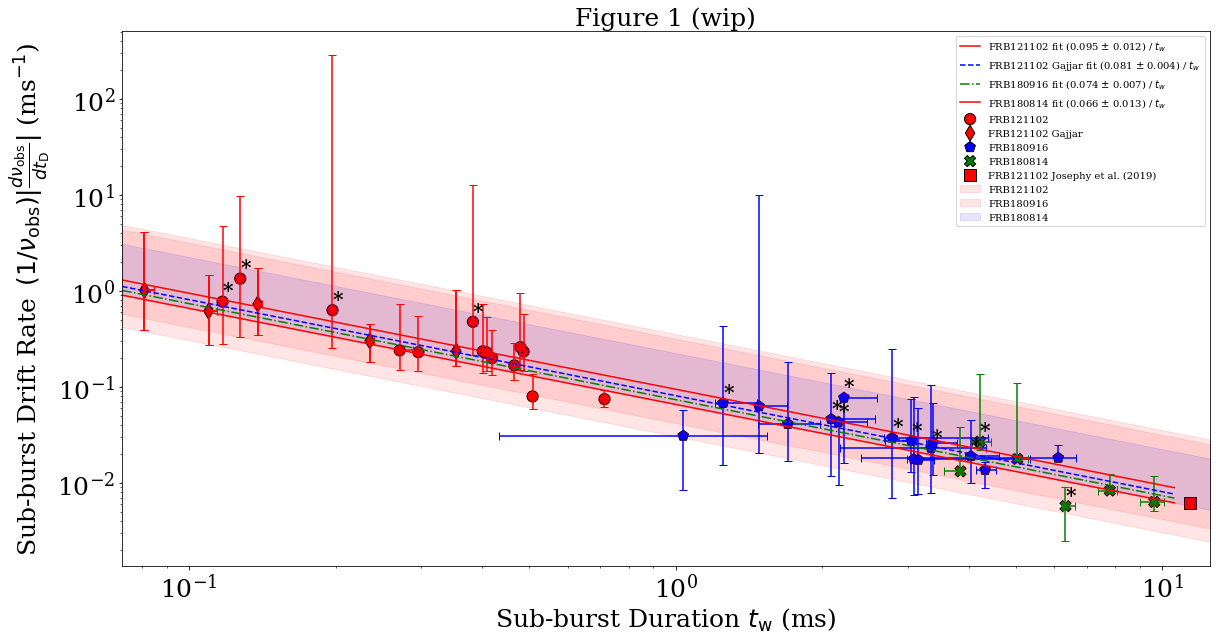

In [156]:
from frbrepeaters import driftlaw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', None)
%matplotlib inline

sources_filenames = [
    "frb121102_michilli_dmvariations.csv",
    'gajjar11a_dmvariations.csv',
    "universal/data/CHIME_180916.J0158+65/dmvars_180916.csv",
    "universal/data/CHIME_FRB180814.J0422+73/dmvars_180814.csv"
]

centerDMs = [
    559.7, # pc/cm3
    565,
    348.82,
    189.4,
]

sources = []
for sfile in sources_filenames:
    df = pd.read_csv(sfile)
    df = df.set_index("name")
    df = driftlaw.computeModelDetails(df)
    sources.append(df)

names = [
    'FRB121102 DM Variations', 
    'FRB121102 Gajjar DM Variations', 
    'FRB180916 DM Variations', 
    'FRB180814 DM Variations'
]
annotations = [
    [0, 1, 2, 3, 4, 5],
    [],
    [3],
    [0, 1, 2, 3, 4, 5]
]
dmlimited = [
    [3, 5, 6, 14],
    [],
    [15.5, 16, 23, 24, 29, 31, 32, 33],
    [180911.0, 180919.0]
]
exclusions = [
    [],
    [],
    [],
    [180917.0], # first is a multi burst, second has negative drift (which should better be corrected by limiting 180814's DM range)
]

def exclusionLogger(exclusionstr, frame):
    print(exclusionstr)
    if frame.empty:
        print(">> bursts excluded: \n\tnone")
    else:
        print('>> bursts excluded:', *[f"\n\t{exname} DM = {row['DM']}" for exname, row in frame.iterrows()])
    return

def DMrangeLogger(sname, frame, burstwise=False):
    if not burstwise:
        print(f"{sname}\t DM Range: {min(frame['DM'])} - {max(frame['DM'])} pc/cm3")
    else:
        print(f'>>> {sname} DM Range by burst:')
        for bname in frame.index.unique():
            DMrangeLogger(f'\tburst {bname}:', frame.loc[bname])
    return

targetDMs = [559.7, 565, 348.82, 188.9]
fig1pltdata = { 'frames': [], 'labels': [], 'colors': cycle(['r', 'r', 'b', 'g']) }
fitdata = pd.DataFrame()
for source, name in zip(sources, names):
    DMrangeLogger(name.split(' DM')[0], source)
    
for source, name, annotate, exclude, targetDM in zip(sources, names, annotations, exclusions, targetDMs):
    frames = []
    labels = []
    
    print('\n#', name.split(' DM')[0]+':')
    DMrangeLogger('', source)

    ## Burst Exclusions
    # exclude bursts that where a fit was not found
    exclusionLogger('> exclusion: no fit found', source[~(source.amplitude > 0)])
    source = source[source.amplitude > 0]
       
    # exclude positive drifts, we assume they are non-physical and an artifact of over dedispersion
    exclusionLogger('> exclusion: drift_abs < 0', source[~(source.drift_abs > 0)])
    source = source[source.drift_abs > 0] 
    
    # exclude drifts with huge errors, they are vertical and poorly measured
    exclusionLogger('> exclusion: drift error > 1e30', source[~(source['drift error (mhz/ms)'] < 1e30)])
    source = source[source['drift error (mhz/ms)'] < 1e30] 
    
    source = source.drop(exclude)
    DMrangeLogger(name.split(' DM')[0], source, burstwise=True) # log the dm range after we're done excluding
    source = driftlaw.driftranges(source) # compute drift ranges after burst exclusions

    # HACKK: exclude 180911 at 190 pc/cm3 cuz drift range switches sign
    if name == names[3]:
        source = source[~((source.DM == 190) & (source.drift_min < 0))]
    source = driftlaw.driftranges(source) # recompute range 

    for dm, color in zip(source.DM.unique(), cycle(['r', 'y', 'b', 'k', 'g', 'c'])):
        df = source[source.DM == dm]
        df['color'] = color
        frames.append(df)
        labels.append(dm)
        
        # Figure 1
        if dm == targetDM:
            df['color'] = next(fig1pltdata['colors'])
            fig1pltdata['frames'].append(df)
            fig1pltdata['labels'].append(name.split(' DM')[0])
        
    # driftlaw.plotDriftVsDuration(frames, labels, title=name, annotatei=annotate, logscale=True)
    _, fits = driftlaw.plotDriftVsDuration(frames, labels, fitlines=['r--', 'y-', 'b-.', 'k--', 'g--', 'c-.'], logscale=True, errorfunc=driftlaw.rangeerror)
    for fit in fits:
        fitdata = fitdata.append({'name': name.split(' ')[0], 'DM': fit[0], 'param': fit[1], 'err': fit[2]}, ignore_index=True)

ax, _ = driftlaw.plotDriftVsDuration(fig1pltdata['frames'], fig1pltdata['labels'], markers=['o', 'd', 'p', 'X'], title='Figure 1 (wip)', annotatei=[],
                                     logscale=True, errorfunc=driftlaw.rangeerror)

## Mark all bursts whose DM ranges were limited by the exclusion process
for i, limitedpoints in enumerate(dmlimited):
    for lp in limitedpoints:
        v = fig1pltdata['frames'][i].loc[lp]
        ax.annotate('*', (v['tau_w_ms'], v['drift_over_nuobs']), xytext=(0,5), textcoords='offset points', weight='bold', size=20)

# see Josephy et al. 2019        
C1data = ['C1', 1.9077, 184, 63, -3.92, 0.01, 630, 0.003, 3, 11.4, 11.4/1000, 0.12, 1]
josephyburst = pd.DataFrame([C1data], columns=['name', 'angle', 'sigmax', 'sigmay', 'drift (mhz/ms)', 'drift error (mhz/ms)', 'center_f', 'time_res', 'freq_res', 'tau_w_ms', 'tau_w', 'tau_w_error', 'red_chisq']).set_index('name')
josephyburst['drift_over_nuobs'] = -1*josephyburst['drift (mhz/ms)']/josephyburst['center_f']
xerr, yerr = driftlaw.modelerror(josephyburst)
ax.scatter(josephyburst['tau_w_ms'], josephyburst['drift_over_nuobs'], c='r', s=125, edgecolors='k', marker='s', label='FRB121102 Josephy et al. (2019)')
ax.errorbar(josephyburst['tau_w_ms'], josephyburst['drift_over_nuobs'], xerr=xerr[0], yerr=yerr[0], ecolor='r')
# josephyburst.plot.scatter(ax=ax, x='tau_w_ms', y='drift_over_nuobs', s=125, c='r', marker='s', edgecolors='k', )

alldata = pd.concat([f for f in fig1pltdata['frames']+[josephyburst]])
x = np.linspace(min(alldata['tau_w_ms'])*0.9, max(alldata['tau_w_ms'])*1.1, num=1200)
for name, color in zip(fitdata.name.unique(), fig1pltdata['colors']):
    params = fitdata.loc[fitdata.name == name]['param']
    std = params.std()
    # print(color)
    ax.fill_between(x, min(params)/x, max(params)/x, alpha=0.1, color=color, label=name)
    ax.legend()
    # print(f'{name} A range: {min(params)} - {max(params)}')
ax.set_xlim(0.0728, 12.5)
# plt.savefig('universal/figures/driftvnuobs_dmvars.pdf')

# Pasted from other notebook, dont run

In [1]:
import numpy as np
import scipy.stats
import scipy.odr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from tqdm import tqdm
import functools
print = functools.partial(print, flush=True) # print doesn't happen til script ends so force it to flush... windows thing?
import pandas as pd
import driftlaw

bursts121102 = pd.read_csv('data/aggregate/burstsFRB121102.csv') 
bursts121102 = bursts121102.set_index('name')
##########
bursts180916 = pd.read_csv('data/aggregate/burstsFRB180916.csv') 
bursts180916 = bursts180916.set_index('name')
bursts180916['time_res'] = 0.00098304 # s
#########
bursts180814 = pd.read_csv('data/aggregate/burstsFRB180814.csv') # DM = 188.9 pc/cm3
bursts180814 = bursts180814.set_index('name')
bursts180814['time_res'] = 0.00098304 # s, Not true for burst 180917
###########
burstsSGR1935 = pd.read_csv('data/aggregate/SGR1935+2154bursts.csv')
burstsSGR1935 = burstsSGR1935.set_index('name')
##########

# Set redshifts
bursts121102['z']  = 0.19273 # (josephy et al. 2019, frbcat.org)
bursts180916['z']  = 0.0337  # (chime 2020b et al.)
bursts180814['z']  = 0.05    # not accurate, z < 0.1 (amiri et al. 2019)
burstsSGR1935['z'] = 0       # ? galactic

#######
bursts121102 = driftlaw.computeModelDetails(bursts121102)
bursts121102.at['C1', 'tau_w_ms'] = 11.4
bursts121102.at['C1', 'tau_w'] = 11.4/1000
bursts121102.at['C1', 'tau_w_error'] = 0.12
bursts121102_to_include = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9a', 'M9b', 'M10a', 'M10b', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'G11D', 'G11A1a', 'G11A1b', 'G11A2', 'G11A3', 'C1']
selectbursts121102 = bursts121102.loc[bursts121102_to_include]

bursts180916 = driftlaw.computeModelDetails(bursts180916)
selectbursts180916 = bursts180916

bursts180814 = driftlaw.computeModelDetails(bursts180814)
selectbursts180814 = bursts180814.drop(180917)

burstsSGR1935 = driftlaw.computeModelDetails(burstsSGR1935)
#display(bursts121102[['tau_w', 'tau_w_error']], bursts180916[['tau_w', 'tau_w_error']], bursts180814[['tau_w', 'tau_w_error']], burstsSGR1935[['tau_w', 'tau_w_error']])

In [2]:
fit_model = scipy.odr.Model(driftlaw.reciprocal_odr)
fit_model_log = scipy.odr.Model(driftlaw.reciprocal_odr_log)
# Color by source
selectbursts121102['color'] = 'r'#'c'
selectbursts121102.at[selectbursts121102.index > 'M', 'color'] = 'r'
selectbursts121102.at['C1', 'color'] = 'r'#'b'
selectbursts180916['color']          = 'b'
selectbursts180814['color']          = 'g'
burstsSGR1935['color']               = 'k'
michillibursts = selectbursts121102.head(18)
otherbursts = selectbursts121102.tail(6)
burstsSGR1935['drift (mhz/ms)']

name
CHIME1     -87.942225
CHIME2    -137.550708
B1       -5501.734912
B2       -3174.179985
S1        -463.136902
Name: drift (mhz/ms), dtype: float64

[0.08219169] [0.00578148]
[0.0823007] [0.00626765]
[0.0714318] [0.00999098]


<ipython-input-3-42e6dec11443>:122: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, opt[0]/x, l, label=lstr)
<ipython-input-3-42e6dec11443>:122: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, opt[0]/x, l, label=lstr)
<ipython-input-3-42e6dec11443>:122: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, opt[0]/x, l, label=lstr)


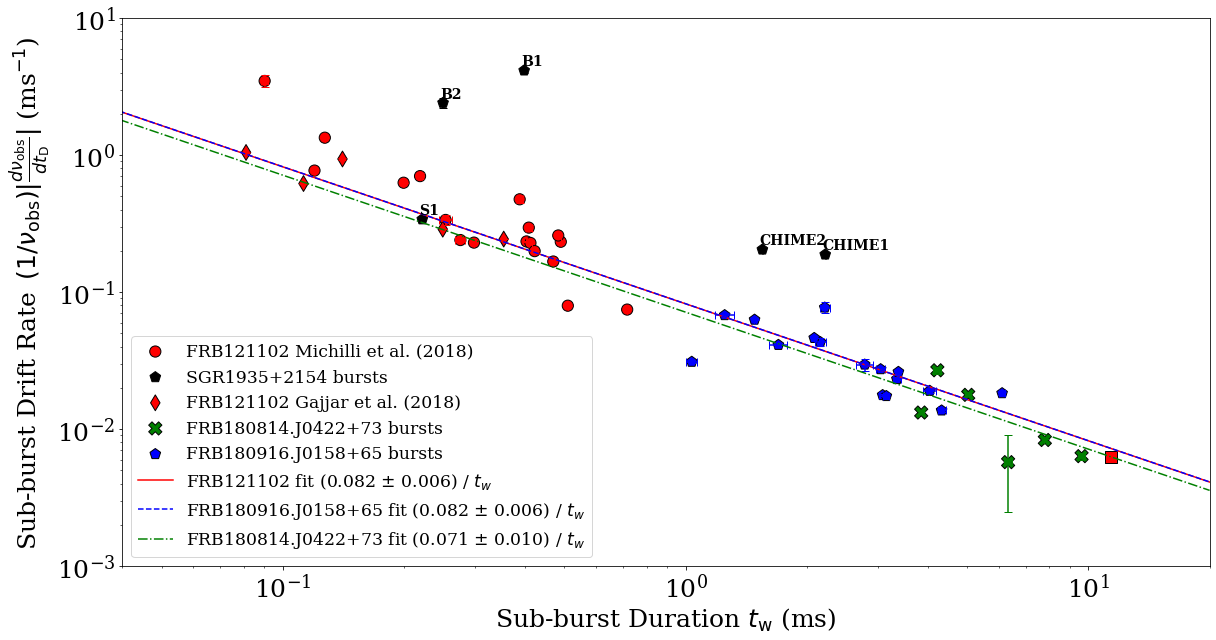

In [3]:
plt.rcParams["errorbar.capsize"] = 4
plt.rcParams["font.family"] = "serif"

markersize = 125#100
fontsize = 25 #18
annotsize = 14
logscale = True
filename = 'log_drift_over_nu_obsvsduration' if logscale else 'drift_over_nu_obsvsduration'
figsize = (17, 8)
figsize = (17, 9)
# figsize = (14, 10)


ax = michillibursts.plot.scatter(x='tau_w_ms', y='drift_over_nuobs', 
                               xerr=np.sqrt(michillibursts['red_chisq'])*michillibursts['tau_w_error'], 
                               yerr=np.sqrt(michillibursts['red_chisq'])*michillibursts['drift error (mhz/ms)']/michillibursts['center_f'], 
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='o', edgecolors='k',
                               label='FRB121102 Michilli et al. (2018)')
    
selectbursts180916.plot.scatter(ax=ax, x='tau_w_ms', y='drift_over_nuobs', 
                               xerr=np.sqrt(selectbursts180916['red_chisq'])*selectbursts180916['tau_w_error'], 
                               yerr=np.sqrt(selectbursts180916['red_chisq'])*selectbursts180916['drift error (mhz/ms)']/selectbursts180916['center_f'], 
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='p', edgecolors='k',
                               label='FRB180916.J0158+65 bursts')
selectbursts180814.plot.scatter(ax=ax, x='tau_w_ms', y='drift_over_nuobs', 
                               xerr=np.sqrt(selectbursts180814['red_chisq'])*selectbursts180814['tau_w_error'], 
                               yerr=np.sqrt(selectbursts180814['red_chisq'])*selectbursts180814['drift error (mhz/ms)']/selectbursts180814['center_f'], 
                               figsize=figsize, s=markersize+50, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='X', edgecolors='k',
                               label='FRB180814.J0422+73 bursts')
                               #label='FRB180814.J0422+73 bursts @ DM={} pc/cm$^3$'.format(dms180814[dm_idx]))
burstsSGR1935.plot.scatter(ax=ax, x='tau_w_ms', y='drift_over_nuobs', 
                               xerr=np.sqrt(burstsSGR1935['red_chisq'])*burstsSGR1935['tau_w_error'], 
                               yerr=np.sqrt(burstsSGR1935['red_chisq'])*burstsSGR1935['drift error (mhz/ms)']/burstsSGR1935['center_f'], 
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='p', edgecolors='k',
                               label='SGR1935+2154 bursts')

otherbursts.head(5).plot.scatter(ax=ax, x='tau_w_ms', y='drift_over_nuobs',
                         xerr=np.sqrt(otherbursts['red_chisq'])*otherbursts['tau_w_error'], 
                         yerr=np.sqrt(otherbursts['red_chisq'])*otherbursts['drift error (mhz/ms)']/otherbursts['center_f'], edgecolors='k',
                         figsize=figsize, s=markersize, c='color', colorbar=False, marker='d', label='FRB121102 Gajjar et al. (2018)') 
otherbursts.tail(1).plot.scatter(ax=ax, x='tau_w_ms', y='drift_over_nuobs',
                         xerr=np.sqrt(otherbursts['red_chisq'])*otherbursts['tau_w_error'], 
                         yerr=np.sqrt(otherbursts['red_chisq'])*otherbursts['drift error (mhz/ms)']/otherbursts['center_f'], edgecolors='k',
                         figsize=figsize, s=markersize, c='color', colorbar=False, marker='s', label='FRB121102 Josephy et al. (2019)') 

# for k, v in otherbursts.iterrows():
#     ax.annotate(k+'_c', (v['tau_w_ms'], v['drift_over_nuobs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in michillibursts.iterrows():
#     ax.annotate(k, (v['tau_w_ms'], v['drift_over_nuobs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in selectbursts180916.iterrows():
#     ax.annotate(int(k) if k != 15.5 else k, (v['tau_w_ms'], v['drift_over_nuobs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
for k, v in burstsSGR1935.iterrows():
    if v['drift_over_nuobs'] > 0 or not logscale:
        ax.annotate(k, (v['tau_w_ms'], v['drift_over_nuobs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in selectbursts180814.iterrows():
#     if v['drift_over_nuobs'] > 0:
#         ax.annotate(k, (v['tau_w_ms'], v['drift_over_nuobs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)

if not logscale:
    pass
    # ax.set_xlim(-0.1, 20)
    # ax.set_ylim(-0.2, 4)
elif logscale:
    ax.set_xlim(0.04, 20)
    ax.set_ylim(10**-3, 10**1)

# ax.set_title('Sub-burst Drift Rate vs. Burst Duration (fit to Michilli bursts)', size=fontsize)
ax.set_xlabel('Sub-burst Duration $t_\\mathrm{w}$ (ms)', size=fontsize)
ax.set_ylabel('Sub-burst Drift Rate $\,(1/\\nu_{\\mathrm{obs}}) \left|\\frac{d\\nu_\\mathrm{obs}}{dt_\\mathrm{D}}\\right|$ (ms$^{-1}$)', size=fontsize)

def driftnu_error(frame):
    sx = np.log((frame['tau_w_ms'] + np.sqrt(frame['red_chisq'])*frame['tau_w_error']) / frame['tau_w_ms'])
    sy = np.log((frame['drift_over_nuobs'] + np.sqrt(frame['red_chisq'])*(frame['drift error (mhz/ms)'])) / frame['drift_over_nuobs'])
    return sx, sy

# ODR fit log
num_to_fit = 24 #23 to exlude chime
fitdata_log = scipy.odr.RealData(np.log(selectbursts121102.head(num_to_fit)['tau_w_ms']), 
                             np.log(selectbursts121102.head(num_to_fit)['drift_over_nuobs']),
                             sx=driftnu_error(selectbursts121102.head(num_to_fit))[0],
                             sy=driftnu_error(selectbursts121102.head(num_to_fit))[1])
                             #sx=np.log(np.sqrt(selectbursts121102.head(num_to_fit)['red_chisq'])*selectbursts121102.head(num_to_fit)['tau_w_error']), 
                             #sy=np.log(np.sqrt(selectbursts121102.head(num_to_fit)['red_chisq'])*selectbursts121102.head(num_to_fit)['drift error (mhz/ms)']/selectbursts121102.head(num_to_fit)['center_f']))
odrfitter_log = scipy.odr.ODR(fitdata_log, fit_model_log, beta0=[500])
odrfitter_log.set_job(fit_type=0)
odrfit_log = odrfitter_log.run()

# ODR fit log 180916
fitdata_log_180916 = scipy.odr.RealData(np.log(selectbursts180916['tau_w_ms']), 
                             np.log(selectbursts180916['drift_over_nuobs']),
                             sx=driftnu_error(selectbursts180916)[0],
                             sy=driftnu_error(selectbursts180916)[1])
                             #sx=np.log(np.sqrt(selectbursts180916['red_chisq'])*selectbursts180916['tau_w_error']), 
                             #sy=np.log(np.sqrt(selectbursts180916['red_chisq'])*selectbursts180916['drift error (mhz/ms)']/selectbursts180916['center_f'] ))
odrfitter_log180916 = scipy.odr.ODR(fitdata_log_180916, fit_model_log, beta0=[1000])
odrfitter_log180916.set_job(fit_type=0)
odrfit_log180916 = odrfitter_log180916.run()

# ODR fit log 180814
fitdata_log_180814 = scipy.odr.RealData(np.log(selectbursts180814['tau_w_ms']), 
                             np.log(selectbursts180814['drift_over_nuobs']),
                             sx=driftnu_error(selectbursts180814)[0],
                             sy=driftnu_error(selectbursts180814)[1])
                             #sx=np.log(np.sqrt(selectbursts180814['red_chisq'])*selectbursts180814['tau_w_error']), 
                             #sy=np.log(np.sqrt(selectbursts180814['red_chisq'])*selectbursts180814['drift error (mhz/ms)']/selectbursts180814['center_f'] ))
odrfitter_log180814 = scipy.odr.ODR(fitdata_log_180814, fit_model_log, beta0=[1000])
odrfitter_log180814.set_job(fit_type=0)
odrfit_log180814 = odrfitter_log180814.run()

### Plot fits
x = np.linspace(0, 20, num=1200)
opts  = [np.exp(odrfit_log.beta), np.exp(odrfit_log180916.beta), np.exp(odrfit_log180814.beta)]
errs  = [opts[0]*(np.exp(odrfit_log.sd_beta)-1), opts[1]*(np.exp(odrfit_log180916.sd_beta)-1), opts[2]*(np.exp(odrfit_log180814.sd_beta)-1)]
#errs  = [np.exp(odrfit_log.sd_beta), np.exp(odrfit_log180916.sd_beta), np.exp(odrfit_log180814.sd_beta)]
#names = ['Fit from FRB121102 bursts', 'Fit from FRB180916.J0158+65 bursts', 'Fit from FRB180814.J0422+73 bursts']

names = ['FRB121102 fit', 'FRB180916.J0158+65 fit', 'FRB180814.J0422+73 fit']
ls    = ['r-', 'b--', 'g-.']
for opt, err, name, l in zip(opts, errs, names, ls):
    print(opt, err)
    lstr = '{} ({:.3f} $\pm$ {:.3f}) / $t_w$'.format(name, opt[0], err[0])
    plt.plot(x, opt[0]/x, l, label=lstr)

handles, labels = ax.get_legend_handles_labels()
#handles = [handles[0], handles[2], handles[4], handles[5], handles[1], handles[3]]
#labels = [labels[0], labels[2], labels[4], labels[5], labels[1], labels[3]]
# handles = [handles[2], handles[5], handles[6], handles[4], handles[3], handles[0], handles[1]]
# labels = [labels[2], labels[5], labels[6], labels[4], labels[3], labels[0], labels[1]]
handles = [handles[3], handles[6], handles[7], handles[5], handles[4], handles[0], handles[1], handles[2]]
labels = [labels[3], labels[6], labels[7], labels[5], labels[4], labels[0], labels[1], labels[2]]
plt.legend(handles, labels, fontsize='xx-large')
# 2 digits, ytitle

# plt.title("Non Redshift Corrected", size=20)
#plt.title("FRB121102, FRB180916.J0158+65, and FRB180814.J0422+73", size=20)
plt.tight_layout()
# plt.savefig('180814_dm{}.png'.format(dms180814[dm_idx]))
# print('180814_dm{}.png'.format(dms180814[dm_idx]))
# for f in ['png', 'pdf', 'eps']: plt.savefig('figures/{}.{}'.format(filename, f))
# for f in ['png']: plt.savefig('figures/{}.{}'.format(filename, f))